#### Mélodie ROSSI L2 SPRINT B

# Calcul des forces de pression sur une digue

Dans ce mini-projet nous allons calculer numériquement les forces appliquées à une digue de forme arbitraire.

![Digue.png](./Digue.png) #déjà dans le notebook miniprojet

___

## Travail préparatoire

La digue que nous allons modéliser est un bloc de béton ($\rho= 3000 kg/m^3$) posé sur le sol rocheux ($\mu_{statique roche}= 0.5$). D'un côté la digue retient une masse d'eau de hauteur $H$, l'autre côté étant exposé à l'air. On prendra $H=10$ m dans toute la suite.

Pour simplifier, on se placera en $2D$ (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

De plus on ne considérera que les forces de pressions dues à la hauteur d'eau (la pression de l'air étant négligée).

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

Bilan des forces:

1. Poids de la digue:
    Il s'exerce vers le bas
    $P= \rho Vg$
2. Force de pression de l'eau sur la face en contact avec l'eau:
    La pression hydrostatique qui s'exerce sur la face en contact avec l'eau est donnée par la loi de la statique des fluides:
        $P_{eau}(y)= \rho_{eau}g(H-y)$
    Cette pression engendre une force résultante $F_{Peau}$ vers la droite
3. Réaction du sol rocheux:
    Elle se décompose en deux:
    - Force normale $N$ exercée par le sol sur la digue (vers le haut)
    - Force de frottement statique $T=\mu N$ avec $\mu = 0.5$, le coefficient de frottement béton-roche (vers la gauche)

La force empêchant la digue de glisser est la force de frottement statique $T=\mu N$; avec l'équilibre statique, cette force contrebalance la force de pression $F_{Peau}$


b. Rappelez l'expression de la pression hydrostatique dans l'eau $P_{eau} (y)$ en fonction de la hauteur par rapport au sol $x$.

La pression hydrostatique à une profondeur $x$ sous la surface de l'eau est :
$$P_{eau}(y)= \rho_{eau}g(H-y)$$
avec :
- $\rho{eau}=1000 kg/m^3$
- $g=9.81 m/s^2$
- $H =10 m$
- $y$ (hauteur depuis le sol)

c. Rappelez la (les) équation(s) d'équilibre statique de la digue.

La digue est en équilibre sous l'effet des forces appliquées, on a donc:
1. Equilibre des forces horizontales:
    $T=F_{eau,x}$
2. Equilibre des forces verticales:
    $N=P$
3. Somme des forces nulle:
    $\sum \vec F = \vec 0$

___

## Modélisation
On définit les pentes de la digue avec $x$ en fonction de $y$ :

![DigueSchema.png](./DigueSchema.png) #déjà dans le notebook miniprojet

On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$.

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe côté eau pour une digue représentée par une fonction affine :

$$
f_{air}(y) = \frac{(H-y).x_a}{H}
$$

d. Donnez l'expression de la fonction côté air dans le cas d'une fonction affine, et tracez-la avec le code suivant.

$$f_{eau}(y)=\frac{(H-y).x_e}{H}$$

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = 5

In [38]:
# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return (H-y)*xe/H

In [39]:
# On crée un tableau de y
y = np.linspace(0, H, 1000)

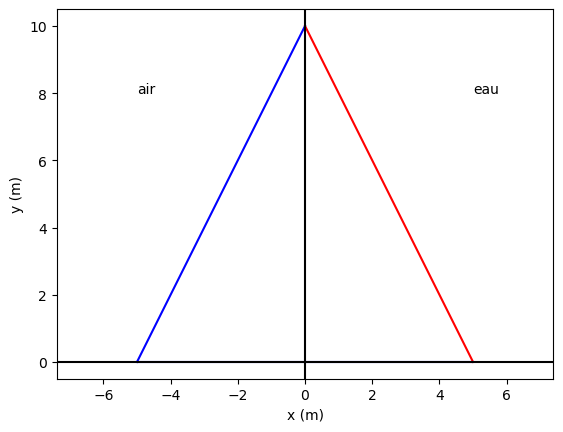

In [40]:
# On trace
plt.plot(fair(y), y, '-b')
plt.plot(feau(y), y, '-r')

plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

___

## Travail en séance

On rappelle que les forces de pression s'exercent perpendiculairement à la surface d'application. $\textbf{Il faut donc pouvoir trouver un vecteur normal à la tangente de ces deux fonctions en tout point}$, qui sera le vecteur directeur de la force de pression locale.

![DigueAngles.png](./DigueAngles.png) #déjà dans le notebook miniprojet

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la $\textbf{dérivée}$ de la courbe par :

$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :

$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x}
$$


Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous sommes en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interface eau-béton :

$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Cas des digues en pentes droites

$\textbf{a.}$ Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multipliée par la longueur $L=1$). En déduire la force de gravité exercée sur la digue.

On réinverse les axes : y en ordonnée et x en abscisse

In [41]:
xe = 5
xa = -5

In [42]:
def f_air(x, H=10):
    """côté air, négatif"""
    a_=H*(1-x/xa)
    return a_

def f_eau(x):
    """côté eau, positif"""
    e_=H*(1-x/xe)
    return e_

In [43]:
def int_f(f, a, b, n):
    """calcul de l'intégrale de f"""
    deltax = (b - a) / n
    output = 0 # Initialisation de la somme à zéro
    for i in range(n):
        output = output + f(a + i * deltax) * deltax
    return output

In [44]:
pas = 1000
L=1

In [45]:
print(int_f(f_eau, 0, xe, pas))

V_digue_droite=int_f(f_eau, 0, xe, pas)*L*2 # on multiplie par 2 car on suppose que les deux cotés sont égaux

print(V_digue_droite)

25.025000000000006
50.05000000000001


Calcul analytique :
$$
V= \iiint_V \mathrm{d}x \mathrm{d}y \mathrm{d}z
$$

$$
V= \int_{0}^{1} \int_{0}^{x_e} \int_{0}^{H(1-\frac{x}{x_e})} \mathrm{d}y \mathrm{d}x \mathrm{d}z
$$

avec :
\begin{cases}
x \in [0, x_e]\\
y \in [0, H(1-\frac{x}{x_e})] \\
z \in [0,1]
\end{cases}


Verification :

$$
V = x_e.H.L
$$
or $L=1$

In [46]:
volume_analytique=xe*H
print("volume =", volume_analytique, "m3")

volume = 50 m3


Calcul de la masse de la digue :

In [47]:
rho_e = 1000 #kg/m3 EAU
rho_b = 3000 #kg/m3 BETON

In [48]:
M_digue_droite = rho_b* V_digue_droite

print(M_digue_droite, "kg")

150150.00000000003 kg


Calcul du poids la digue :

In [49]:
g = 9.81 # m/s2

In [50]:
P_digue_droite = g * M_digue_droite

print(P_digue_droite, "N")

1472971.5000000005 N


$\textbf{b.}$ Pour le cas des fonctions affines, calculez la résultante (vectorielle ; il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression côté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. (On ne cherchera pas à faire le calcul analytique !)

In [51]:
xe = 5
xa = -5
H = 10

y=np.linspace(0, H, 1000)

La pression hydrostatique à une profondeur $y$ sous la surface de l'eau est :
$$P_{eau}(y)= \rho_{eau}g(H-y)$$
avec :
- $\rho{eau}=1000 kg/m^3$
- $g=9.81 m/s^2$
- $H =10 m$
- $y$ (hauteur depuis le fond de la digue)

On calcule la résultante des forces de pression exercées sur la digue, en intégrant :  $$dF_{px} = P_0 - \rho gy =  \rho_{eau}g(H-y)$$ puis $$dF_{py} = (P_0 - \rho gy)tan(\theta) = (P_0 - \rho gy)\frac{xe}{H}  = -\frac{xe}{H} \rho_{eau}g(H-y) $$

In [52]:
#Fonction force élémentaire selon y:
def dFpy(y):
    return -rho_e*g*(H-y)*xe/H

#Fonction force élémentaire selon x:
def dFpx(y):
    return rho_e*g*(H-y)

Fpy = int_f(dFpy,0,H,1000)
Fpx = int_f(dFpx,0,H,1000)
print('Résultante des forces de pression selon y :', Fpy, 'N')
print('Résultante des forces de pression selon x :', Fpx, 'N')

Résultante des forces de pression selon y : -245495.2500000004 N
Résultante des forces de pression selon x : 490990.5000000008 N


$\textbf{c.}$ En supposant que la digue est en équilibre statique translationnel, calculez avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composantes $T/N$. En considérant le coefficient de frottement roche/béton de 0.5, la digue est-elle en équilibre translationnel ?

$$Fpx = 250500 N$$

$$Fpy =500000 N$$

On a $$-mg  + F_{py} + N = 0$$ et $$F_{px} + T = 0$$

In [53]:
N = P_digue_droite - Fpy
T = - Fpx

T_N=abs(T/N)
print(T_N)

0.28571428571428603


$\frac {T}{N}$ est inférieur à $\mu$=0.5, donc la digue est en équilibre translationnel.

On a $\lvert \mu \rvert = \lvert T/N \rvert= 0.286 < 0.5$

On peut en déduire que, dans ces conditions, la digue n'est pas à l'équilibre translationnel, car la condition  $\lvert \mu \rvert = 0.286 \le 0.5$ est vérifiée.

$\textbf{d.}$ Reprenez le calcul du rapport $T/N$ et du volume de béton en imposant $x_a=-5$ et $x_e=0$. La digue est-elle stable ? (Il sera utile d'écrire une fonction résumant les calculs des questions a. b. c.)

In [54]:
x_a = -5
x_e = 0
H = 10
y=np.linspace(0, H, 1000)

In [55]:
def volume_beton(f_eau, x_a, x_e, H):
    V_=int_f(f_eau, x_a, x_e, pas)*L
    return V_

#Fonction force élémentaire selon y:
def dFpy(y, H=10, rho_e=1000):
    return -rho_e*g*(H-y)*x_e/H

#Fonction force élémentaire selon x:
def dFpx(y, H=10, rho_e=1000, g=9.81):
    return rho_e*g*(H-y)


def TN(x_a, x_e,volume, y, H=10, rho_e=1000, rho_b=3000, g=9.81):
    poids=volume*g*rho_b
    F_py_ = int_f(dFpy,0,H,1000)
    F_px_ = int_f(dFpx,0,H,1000)
    T= - F_px_
    N=poids-F_py_
    return abs(T/N)

In [56]:
print(TN(-5, 0, volume_beton(f_eau, -5, 0, 10), y))

0.2223703210041101


On a $\lvert \mu \rvert = \lvert T/N \rvert= 0.22 < 0.5$
Donc la digue est stable.

$\textbf{e.}$ Reprenez le calcul avec $x_a=0$ et $x_e=+5$. Que constatez-vous ? Expliquez pourquoi la digue est stable dans un cas mais pas l'autre.

In [57]:
print(TN(0, 5, volume_beton(f_eau, 0, 5, 10), y))

0.6666666666666676


On a $\lvert \mu \rvert = \lvert T/N \rvert= 0.67 < 0.5$
Donc la digue n'est pas stable. La digue est stable dans le cas précédent car seul le volume du côté négatif ($x_a>0$) est important pour la stabilité. C'est à cause de la hauteur H du côté de l'eau, il faut une masse importante pour contrabalancer la force de pression de l'eau sur la digue.

### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

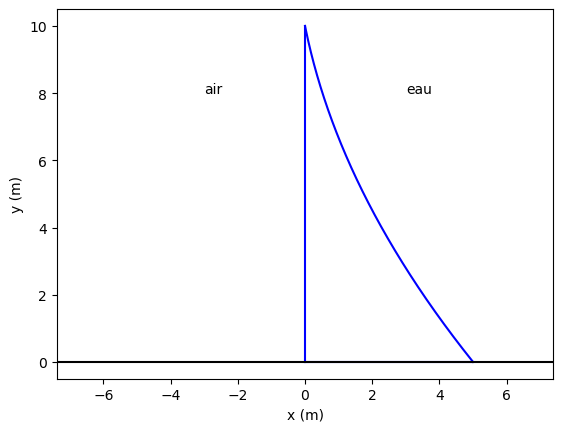

In [59]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

f. Calculez, pour $a=3$, $x_a=0$ et $x_e=5$, la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique. La digue est-elle en équilibre translationnel ?

In [60]:
a=3
x_a=0
x_e=5
H=10

$$F_{py} = \int_{0}^H \rho g(H - y)f'_{eau}dy = \int_{0}^H \rho g(H - y)(\frac{2ay}{H^2}-\frac{a+x_e}{H})dy$$ $$F_{px} = -\int_{0}^H \rho g(H - y)dy$$

In [61]:
def dFpy(y):
    return rho_e*g*(H-y)*(2*a*y/H**2 - (a+x_e)/H)

def dFpx(y):
    return rho_e*g*(H-y)

def volume_concave(f_eau, x_a, x_e, H=10):
    A_e =int_f(f_eau, 0, x_e, 1000)
    A_a = int_f(fair, x_a, 0, 1000)
    Volume_= A_e+A_a
    return Volume_

In [62]:
def TN(x_a, x_e, volume, y, H=10, rho_e=1000, rho_b=3000, g=9.81):
    poids = volume*g*rho_b
    F_py_ = int_f(dFpy,0,H,1000)
    F_px_ = int_f(dFpx,0,H,1000)
    T= - F_px_
    N= F_py_ - poids
    return (abs(T/N), F_py_, F_px_)

In [63]:
T_N1, F_py1, F_px1 = TN(x_a, x_e, volume_concave(f_eau, x_a, x_e), y)

print("V =", volume_concave(feau, x_a, x_e, H), "m3")
print("T/N =", T_N1)
print("F_py =", F_py1)
print("F_px =", F_px1)

V = 16.258125625000005 m3
T/N = 0.4761451290353302
F_py = -294692.49810000113
F_px = 490990.5000000008


Pour un volume de $16.26 m^3$, on a un rapport T/N de $0.48$ ce qui est très proche de $\mu=0.5$. Il est inférieur à $0.5$ donc la digue est stable.

g. Reprenons le calcul avec $x_e=6$. La digue est-elle en équilibre ? Comparez avec le cas de la pente affine avec $x_a=0$ et $x_e=5$. Laquelle est la plus favorable ?

In [64]:
x_e=6

T_N2, F_py2, F_px2 = TN(x_a, 6, volume_concave(f_eau, x_a, 6, H), y)

print("V =", volume_concave(feau, x_a, 6, H), "m3")
print("T/N =", T_N2)
print("F_py =", F_py2)
print("F_px =", F_px2)

V = 17.771161080000024 m3
T/N = 0.46708907197287436
F_py = -343791.54809999955
F_px = 490990.5000000008


Dans le cas de la pente affine, la digue n'était pas stable. Ici, le rapport T/N est de $0.47$, ce qui montre que la digue est stable.

h. Utilisez une boucle pour calculer le volume et le rapport $T/N$ en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume. Déterminez graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

$$\textbf{Pour la fin, je ne comprends pas où est mon erreur.}$$
Je suis censée trouver une courbe de T/N en fonction de V qui coupe y=0.5 mais ce n'est pas le cas.

In [65]:
x_e_boucle=np.linspace(5, 6, 1000)

In [66]:
V=[]
T_N=[]
for x_e1 in x_e_boucle:
    V_=volume_concave(feau, 0, x_e1, H)
    T_N3, F_py3, F_px3 = TN(0, x_e1, volume_concave(f_eau, x_a, x_e1, H), y)
    V.append(V_)
    T_N.append(T_N3)

[16.258125625000005, 16.25988000468971, 16.26163388378883, 16.263387262357508, 16.265140140455795, 16.266892518143788, 16.268644395481573, 16.270395772529234, 16.272146649346904, 16.27389702599466, 16.275646902532532, 16.27739627902069, 16.279145155519146, 16.280893532088093, 16.282641408787526, 16.284388785677564, 16.286135662818342, 16.287882040269874, 16.289627918092293, 16.29137329634569, 16.293118175090125, 16.294862554385748, 16.29660643429257, 16.298349814870786, 16.300092696180354, 16.301835078281503, 16.303576961234214, 16.305318345098623, 16.307059229934808, 16.30879961580286, 16.310539502762918, 16.31227889087498, 16.3140177801992, 16.315756170795677, 16.317494062724446, 16.319231456045635, 16.320968350819335, 16.322704747105636, 16.32444064496458, 16.326176044456357, 16.327910945640966, 16.32964534857852, 16.33137925332913, 16.333112659952878, 16.33484556850987, 16.336577979060163, 16.338309891663837, 16.34004130638099, 16.341772223271775, 16.343502642396228, 16.34523256381

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_20204\2400818605.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(V, 0.5*np.ones(len(V)), 'r', label="$\mu=0.5$")


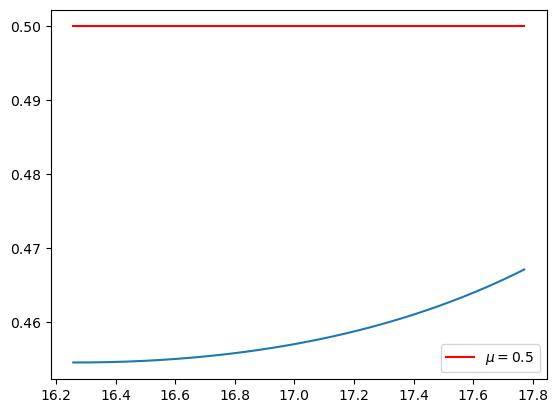

In [67]:
plt.plot(V, T_N)
print(V)

plt.plot(V, 0.5*np.ones(len(V)), 'r', label="$\mu=0.5$")
plt.legend()
plt.show()

i. Expliquez pourquoi la forme courbe de l'interface aide à réduire le volume de béton nécessaire à garder la digue en équilibre.

Il y a plus de surface à l'interface permettant de mieux distribuer la force de pression de l'eau sur la digue.